2019 SHED survey dataset
https://www.federalreserve.gov/consumerscommunities/shed_data.htm
https://www.federalreserve.gov/publications/2020-update-economic-well-being-of-us-households-preface.htm

Codebook:
https://www.federalreserve.gov/consumerscommunities/files/SHED-2019-codebook.pdf

Only the fields of interest are included in the dataset for the course. 

Fields of interest
----------------------------------
- CaseID
- Duration (seconds)
- B2: Overall, how well managing financially? (-1 no answer, 1 Finding it difficult to get by, 2 just getting by, 3 doing ok, 4 living comfortably)
- B7: Rate economic conditions today (-1 no answer, 1 poor, 2 only fair, 3 good)
    -_a in your community
    -_b in this country
- D1A: Last month did you do any work either for pay or profit? (-1 no answer, 0 no, 1 yes)
- D1E: At any time during the past month did you want more work? (-1 no answer, 0 no , 1 yes)
- EF3: If had emergency costing $400, how would you pay? (-1 no answer, 0 No, 1 Yes)

    -_a credit card, pay in full next statement
    
    -_b: cc, pay over time
    
    -_c: cash or checking/savings
    
    -_d: bank loan or line of credit
    
    -_e: borrow from friends and family
    
    -_f: payday loan, advance or overdraft
    
    -_g: selling something
    
    -_h: would not be able to

**Answers coded as 'refused' have been recoded to `pd.NA`**

Data quality issues
-----------------------------------
- \[X\] casing in strings
- \[ \] lead/trailing whitespace and other pollution?
- \[ \] EF3 and B7 categories split over columns
- \[ \] EF3 answers not mutually exclusive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# kind of a brown color palette this time
# https://colordesigner.io/#BF986D-806549-FFCA92-403324-E6B683
pal = ['#403324', '#E6B683', '#2E7D32', '#91C46C', '#04756F', '#212121', '#616161']

In [3]:
shed = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/data/shed_survey.csv')

In [4]:
shed.describe()

,CaseID,Duration
count,12173.000000,12173.000000
mean,6128.818040,6760.722418
std,3534.659266,39141.086269
min,1.000000,362.000000
25%,3067.000000,876.000000
50%,6135.000000,1149.000000
75%,9191.000000,1640.000000
max,12238.000000,850226.000000


In [5]:
shed.columns

Index(['CaseID', 'Duration', 'B2', 'B7_a', 'B7_b', 'D1A', 'D1E', 'EF3_a',
       'EF3_b', 'EF3_c', 'EF3_d', 'EF3_e', 'EF3_f', 'EF3_g', 'EF3_h'],
      dtype='object')

## Quick overview of emergency variable responses

In [6]:
# identify columns with EF3
efcol = shed.columns[shed.columns.str.match('EF3')]
efcol

Index(['EF3_a', 'EF3_b', 'EF3_c', 'EF3_d', 'EF3_e', 'EF3_f', 'EF3_g', 'EF3_h'], dtype='object')

In [7]:
# count the 'yes' responses
# remember people say yes to more than one sometimes!

shed.loc[:, efcol].apply(lambda x: x.value_counts()['yes'])

EF3_a    4468
EF3_b    1840
EF3_c    5737
EF3_d     302
EF3_e    1042
EF3_f     171
EF3_g     700
EF3_h    1303
dtype: int64

In [8]:
# with better index labels, for plotting

ef3 = shed.loc[:, efcol].apply(lambda x: x.value_counts()['yes'])
ef3.index = ef3.index.map({'EF3_a' : 'cc_infull', 'EF3_b': 'cc_overtime', 'EF3_c': 'cash', 'EF3_d': 'bank_loan',
                          'EF3_e': 'friend_loan', 'EF3_f': 'payday_loan', 'EF3_g': 'sell_something', 'EF3_h': 'unable'})

ef3

cc_infull         4468
cc_overtime       1840
cash              5737
bank_loan          302
friend_loan       1042
payday_loan        171
sell_something     700
unable            1303
dtype: int64

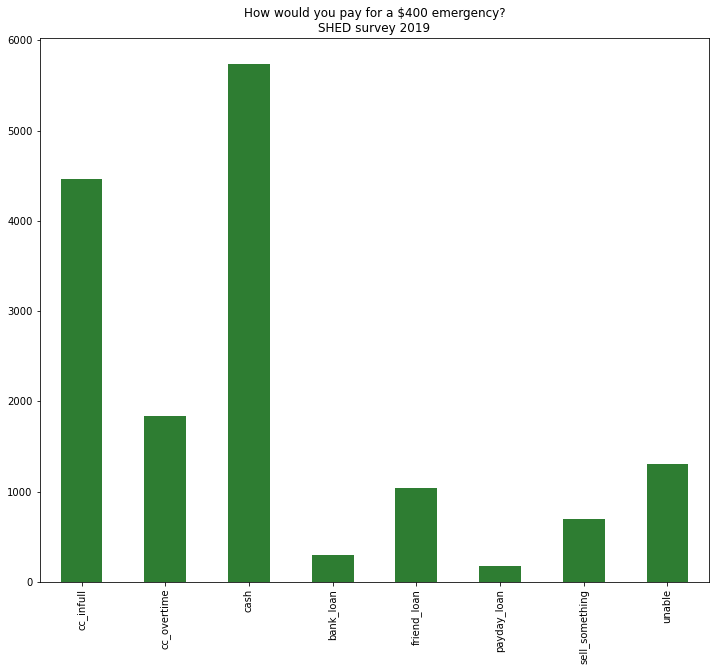

In [9]:
ef3.plot(kind = 'bar', color = pal[2], figsize = (12, 10), 
        title = 'How would you pay for a $400 emergency?\nSHED survey 2019')

plt.savefig('images/shed_emergency_full.jpeg')

In [10]:
# divide by total number of respondents in the survey

ef3 = ef3 / shed.shape[0]

In [11]:
ef3

cc_infull         0.367042
cc_overtime       0.151154
cash              0.471289
bank_loan         0.024809
friend_loan       0.085599
payday_loan       0.014047
sell_something    0.057504
unable            0.107040
dtype: float64

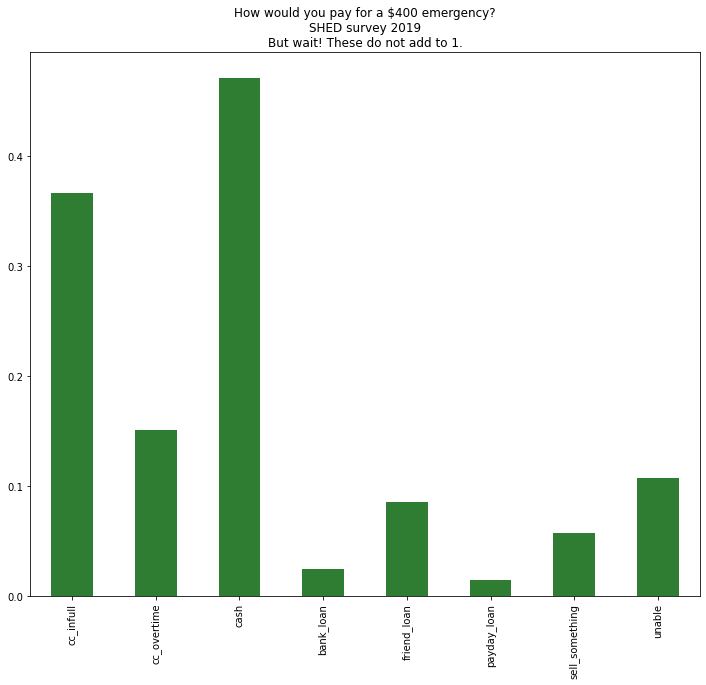

In [12]:
ef3.plot(kind = 'bar', color = pal[2], figsize = (12, 10), 
        title = 'How would you pay for a $400 emergency?\nSHED survey 2019\nBut wait! These do not add to 1.')

plt.savefig('images/shed_emergency_full_normalized.jpeg')

## Q: How many can pay a \$400 emergency with cash?
Ignores missing values by default. 

Note this differs from ['cash or equivalent'](https://www.federalreserve.gov/publications/2020-economic-well-being-of-us-households-in-2019-dealing-with-unexpected-expenses.htm) since it does not include credit card paid next month.

In [13]:
shed.loc[:, 'EF3_c'].value_counts()

no     6379
yes    5737
Name: EF3_c, dtype: int64

### What proportion? Include missing or no?
In this case it doesn't matter because by far most people answered the question.

#### pay cash / total non-missing answers

In [14]:
shed.loc[:, 'EF3_c'].value_counts(normalize = True)

no     0.526494
yes    0.473506
Name: EF3_c, dtype: float64

#### pay cash / total rows in data
No big deal here.

In [15]:
shed.loc[:, 'EF3_c'].value_counts(normalize = True, dropna = False)

no     0.524029
yes    0.471289
NaN    0.004682
Name: EF3_c, dtype: float64

In [16]:
shed.groupby(['EF3_c', 'D1A']).CaseID.count()

EF3_c  D1A
no     no     2640
       yes    3739
yes    no     2128
       yes    3609
Name: CaseID, dtype: int64

or like this

In [17]:
shed.groupby(['EF3_c', 'D1A']).size()

EF3_c  D1A
no     no     2640
       yes    3739
yes    no     2128
       yes    3609
dtype: int64

<AxesSubplot:xlabel='EF3_c,D1A'>

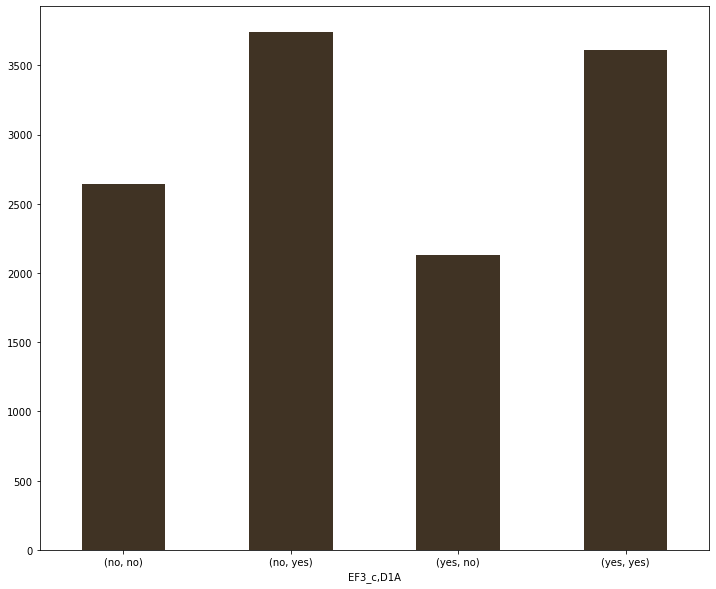

In [18]:
shed.groupby(['EF3_c', 'D1A']).size().plot(kind = 'bar', rot = 0, color = pal[0], figsize = (12, 10))

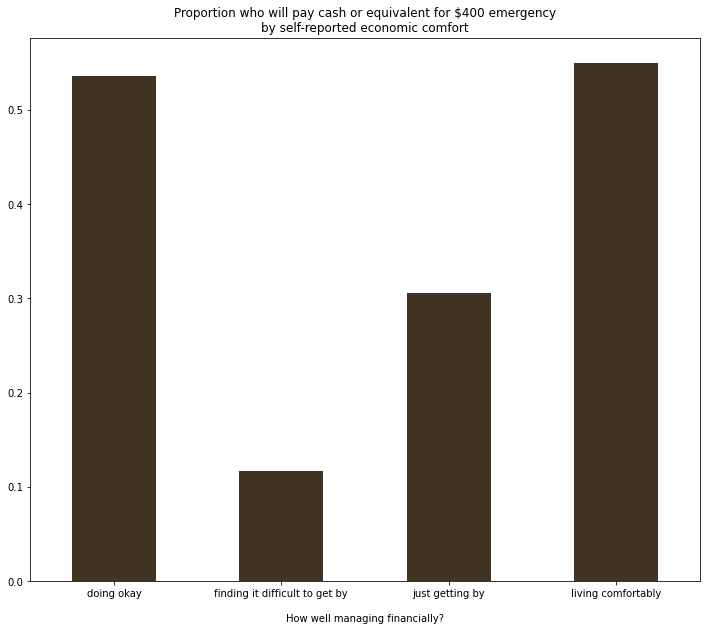

In [19]:
shed.groupby('B2').agg(
    cash = ('EF3_c',  lambda x: x.value_counts(normalize = True)['yes'])
).plot(kind = 'bar', legend = None, 
      xlabel = '\nHow well managing financially?',
      figsize = (12, 10), rot = 0, color = pal[0],
      title = 'Proportion who will pay cash for $400 emergency\nby self-reported economic comfort')

## Q: What to do about multiple answers?
Some people listed multiple answers for the emergency payment question. Let's find them then see if it's worth exploring some options for how to incorporate this information.

In the code below: Apply this anonymous function (starts with lambda x: , think of this as f(x) for a function f applied to x)
to each row  (apply axis argument tells you which axis to cross. axis = 0 is rows, axis = 1 is cols, so crossing cols applies the function to each row). Not exactly the most efficient way but fine for this size of data.

This is a pandas Series object, i.e. same type as a column of a data frame.

In [20]:
shed.apply(lambda x: x.loc[efcol].eq('yes').sum(), axis = 1)

0        3
1        1
2        1
3        1
4        1
        ..
12168    1
12169    1
12170    1
12171    1
12172    1
Length: 12173, dtype: int64

In [21]:
# assign it to a new variable in the data frame
shed = shed.assign(n_yes = shed.apply(lambda x: x.loc[efcol].eq('yes').sum(), axis = 1))

In [22]:
shed.head()

,CaseID,Duration,B2,B7_a,B7_b,D1A,D1E,EF3_a,EF3_b,EF3_c,EF3_d,EF3_e,EF3_f,EF3_g,EF3_h,n_yes
0,1,24665,doing okay,poor,poor,no,yes,yes,no,yes,no,no,no,yes,no,3
1,2,721,doing okay,good,good,no,yes,no,no,yes,no,no,no,no,no,1
2,3,937,doing okay,good,good,yes,no,yes,no,no,no,no,no,no,no,1
3,4,1066,just getting by,only fair,good,yes,no,no,no,yes,no,no,no,no,no,1
4,5,1441,living comfortably,good,good,no,no,no,no,yes,no,no,no,no,no,1


<AxesSubplot:>

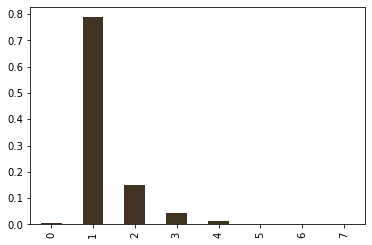

In [23]:
shed.n_yes.value_counts(normalize = True, sort = False).plot(kind = 'bar', color = pal[0])

In [24]:
# size vs count: size gives number of rows, count is number of non-missing values
shed.groupby(['n_yes', 'B2'], as_index = False).size()

,n_yes,B2,size
0,0,doing okay,25
1,0,finding it difficult to get by,3
2,0,just getting by,14
3,0,living comfortably,15
4,1,doing okay,3778
5,1,finding it difficult to get by,549
6,1,just getting by,1538
7,1,living comfortably,3708
8,2,doing okay,731
9,2,finding it difficult to get by,117


In [25]:
# for easier plotting
shed.groupby(['n_yes', 'B2'], as_index = False).size().pivot(index = 'n_yes', columns = 'B2', values = 'size')

B2,doing okay,finding it difficult to get by,just getting by,living comfortably
n_yes,,,,
0,25.0,3.0,14.0,15.0
1,3778.0,549.0,1538.0,3708.0
2,731.0,117.0,360.0,633.0
3,208.0,68.0,169.0,71.0
4,52.0,18.0,53.0,13.0
5,13.0,9.0,11.0,2.0
6,3.0,1.0,NaN,NaN
7,NaN,NaN,NaN,1.0


In [26]:
# or even more concisely
dyes = shed.groupby(['n_yes', 'B2']).size().unstack()
dyes

B2,doing okay,finding it difficult to get by,just getting by,living comfortably
n_yes,,,,
0,25.0,3.0,14.0,15.0
1,3778.0,549.0,1538.0,3708.0
2,731.0,117.0,360.0,633.0
3,208.0,68.0,169.0,71.0
4,52.0,18.0,53.0,13.0
5,13.0,9.0,11.0,2.0
6,3.0,1.0,NaN,NaN
7,NaN,NaN,NaN,1.0


<AxesSubplot:title={'center':'Counts of multiple yes answers to emergency payment question\nby response to how well managing financially'}, xlabel='n_yes'>

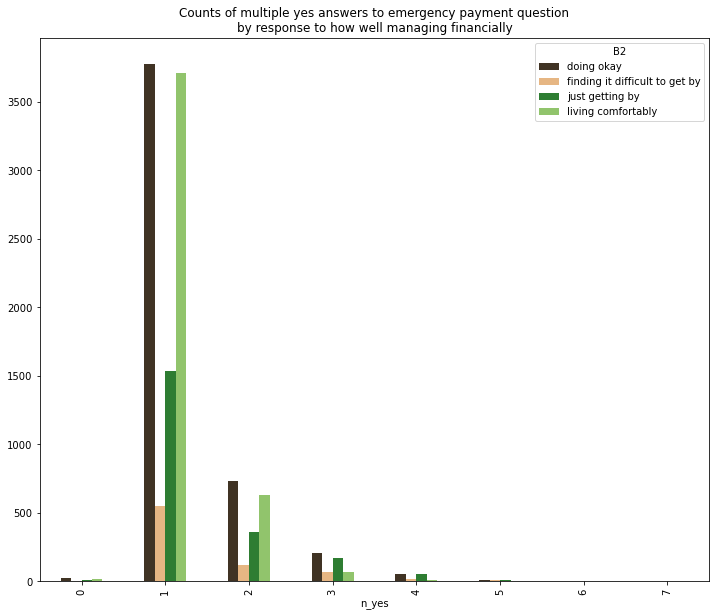

In [27]:
dyes.plot(kind = 'bar', color = pal, figsize = (12, 10), 
          title = 'Counts of multiple yes answers to emergency payment question\nby response to how well managing financially')

Since the n_yes group sizes differ, let's look at the proportions within each `n_yes` group. Need to create a series of group sizes for n_yes then divide through.

NaN are effectively zeros here, but no need to convert since we won't see them in the plot.

If we were dividing rowwise could do `dyes / shed.groupby('n_yes').size()`.c

In [28]:
shed.groupby('n_yes').size()

n_yes
0      57
1    9583
2    1841
3     516
4     136
5      35
6       4
7       1
dtype: int64

If we were dividing along columns for each row could do `dyes / shed.groupby('n_yes').size()`. But we want to divide along rows for each column, so use the .div method.

Each row sums to one.

In [29]:
dyes.div(shed.groupby('n_yes').size(), axis = 'rows')

B2,doing okay,finding it difficult to get by,just getting by,living comfortably
n_yes,,,,
0,0.438596,0.052632,0.245614,0.263158
1,0.394240,0.057289,0.160493,0.386935
2,0.397067,0.063552,0.195546,0.343835
3,0.403101,0.131783,0.327519,0.137597
4,0.382353,0.132353,0.389706,0.095588
5,0.371429,0.257143,0.314286,0.057143
6,0.750000,0.250000,NaN,NaN
7,NaN,NaN,NaN,1.000000


In [30]:
# check for yourself what's going on, with the n_yes = 0 row
# this should be the same as the first row above
dyes.loc[0] / shed.groupby('n_yes').size()[0]

B2
doing okay                        0.438596
finding it difficult to get by    0.052632
just getting by                   0.245614
living comfortably                0.263158
Name: 0, dtype: float64

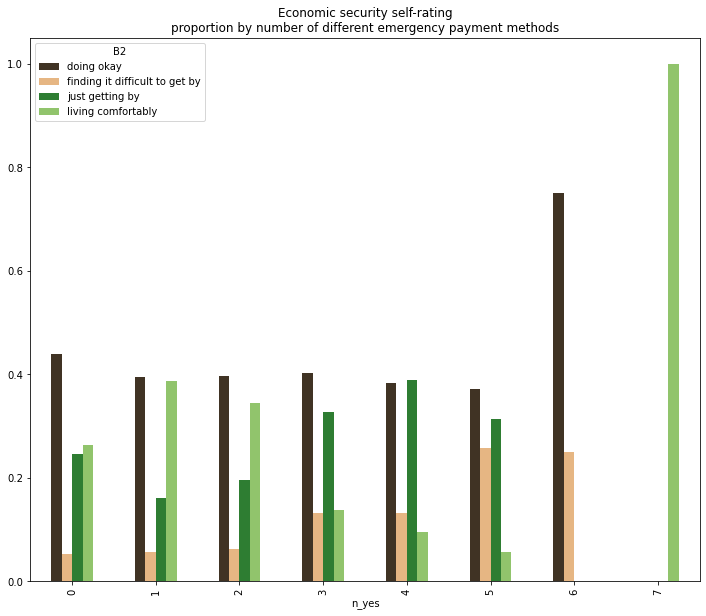

In [31]:
dyes.div(shed.groupby('n_yes').size(), axis = 'rows').plot(kind = 'bar', color = pal, figsize = (12, 10), 
          title = 'Economic security self-rating\nproportion by number of different emergency payment methods')

plt.savefig('images/shed_security_by_nanswer.jpeg')

Let's flip it! Proportion within each managing financially response group.

Now each column sums to one.

In [32]:
dyes.div(shed.groupby('B2').size(), axis = 'columns')

B2,doing okay,finding it difficult to get by,just getting by,living comfortably
n_yes,,,,
0,0.005198,0.003922,0.006527,0.003376
1,0.785447,0.717647,0.717016,0.834571
2,0.151975,0.152941,0.167832,0.142471
3,0.043243,0.088889,0.078788,0.015980
4,0.010811,0.023529,0.024709,0.002926
5,0.002703,0.011765,0.005128,0.000450
6,0.000624,0.001307,NaN,NaN
7,NaN,NaN,NaN,0.000225


In [33]:
dyes.div(shed.groupby('B2').size(), axis = 'columns').sum()

B2
doing okay                        1.0
finding it difficult to get by    1.0
just getting by                   1.0
living comfortably                1.0
dtype: float64

In [34]:
# transpose (swap columns / index) for nicer plotting
dyes.div(shed.groupby('B2').size(), axis = 'columns').transpose()

n_yes,0,1,2,3,4,5,6,7
B2,,,,,,,,
doing okay,0.005198,0.785447,0.151975,0.043243,0.010811,0.002703,0.000624,NaN
finding it difficult to get by,0.003922,0.717647,0.152941,0.088889,0.023529,0.011765,0.001307,NaN
just getting by,0.006527,0.717016,0.167832,0.078788,0.024709,0.005128,NaN,NaN
living comfortably,0.003376,0.834571,0.142471,0.015980,0.002926,0.000450,NaN,0.000225


<AxesSubplot:title={'center':'Percentage of multiple yes answers to emergency payment question\n height = in n_yes category / in B2 category'}, xlabel='B2'>

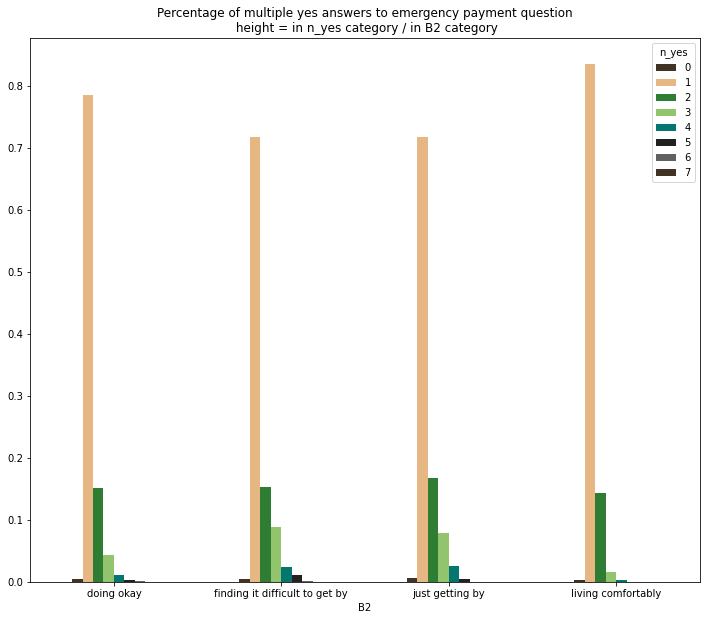

In [35]:
dyes.div(shed.groupby('B2').size(), axis = 'columns'
        ).transpose().plot(kind = 'bar', 
                           color = pal, figsize = (12, 10), rot = 0, 
                           title = 'Percentage of multiple yes answers to emergency payment question\n height = in n_yes category / in B2 category')

These are pretty similar, but people who are 'finding it difficult to get by' or 'just getting by' list more than one emergency payment method at higher rates than people in other categories. This is important information if we want to consider dropping rows for which `n_yes != 1`.

## Emergency payments question: what to do about `n_yes != 1`?


### Drop them, recalculate proportion of people paying for emergency with cash or equivalent?

Does the picture change? Start with the original all-payment-type bar chart.

In [36]:
ef3 = shed.loc[shed.n_yes == 1, efcol].apply(lambda x: x.value_counts(normalize = True)['yes'])
ef3.index = ef3.index.map({'EF3_a' : 'cc_infull', 'EF3_b': 'cc_overtime', 'EF3_c': 'cash', 'EF3_d': 'bank_loan',
                          'EF3_e': 'friend_loan', 'EF3_f': 'payday_loan', 'EF3_g': 'sell_something', 'EF3_h': 'unable'})

ef3

cc_infull         0.325681
cc_overtime       0.104560
cash              0.412710
bank_loan         0.009183
friend_loan       0.031514
payday_loan       0.003026
sell_something    0.010226
unable            0.103099
dtype: float64

In [37]:
# these now add to 1
ef3.sum()

1.0

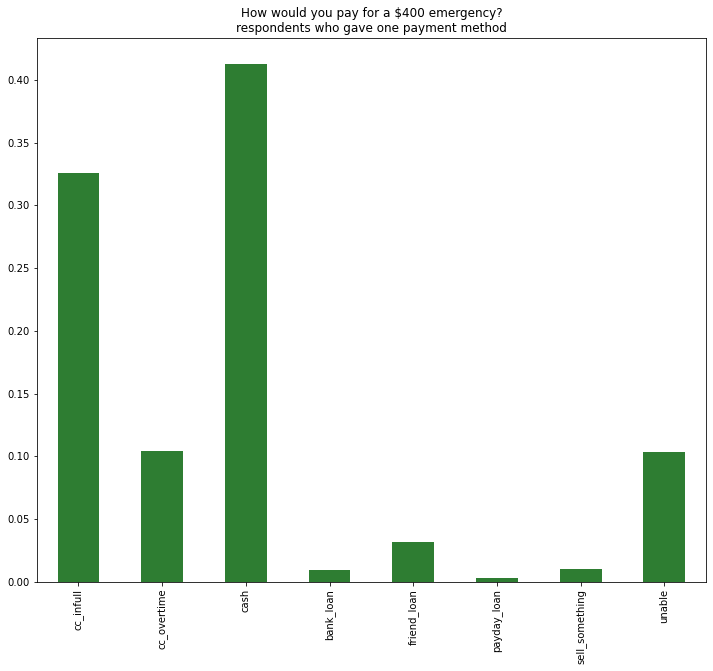

In [38]:
ef3.plot(kind = 'bar', color = pal[2], figsize = (12, 10), 
        title = 'How would you pay for a $400 emergency?\nrespondents who gave one payment method')

plt.savefig('images/shed_emergency_full_oneanswer.jpeg')

In [39]:
shed.loc[shed.n_yes == 1, 'EF3_c'].value_counts(normalize = True)

no     0.58729
yes    0.41271
Name: EF3_c, dtype: float64

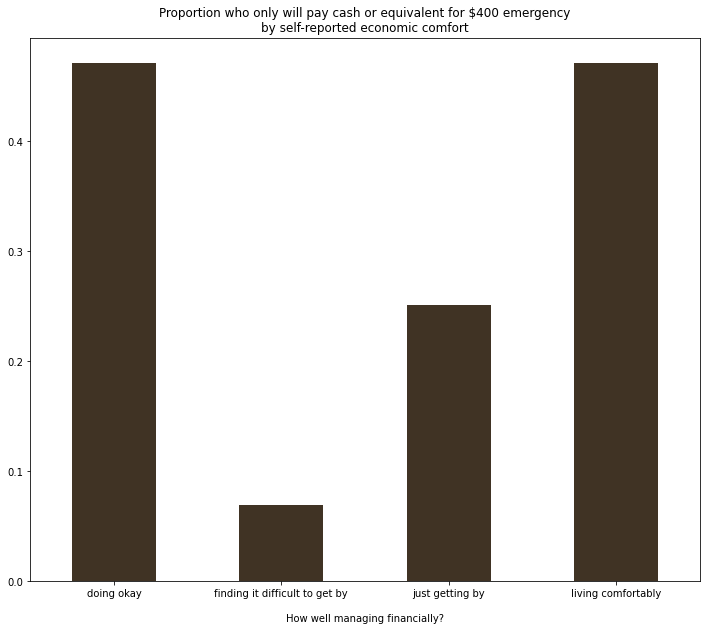

In [40]:
shed.loc[shed.n_yes == 1].groupby('B2').agg(
    cash = ('EF3_c',  lambda x: x.value_counts(normalize = True)['yes'])
).plot(kind = 'bar', legend = None, 
       xlabel = '\nHow well managing financially?',
      figsize = (12, 10), rot = 0, color = pal[0],
      title = 'Proportion who only will pay cash or equivalent for $400 emergency\nby self-reported economic comfort')

plt.savefig('images/shed_emergency_oneanswer.jpeg')

### Calculate proportion who only chose cash?
Slightly different perspective, but a big difference in the result! 

Count the number who only chose cash, then divide by the total number of respondents (rather than the total number who only gave one answer).

In [41]:
shed.loc[shed.n_yes == 1, 'EF3_c'].value_counts() / shed.shape[0]

no     0.462335
yes    0.324899
Name: EF3_c, dtype: float64

In [42]:
# alternatively, bake it into the row condition 
shed.loc[shed.n_yes.eq(1) & shed.EF3_c.eq('yes')].shape[0] / shed.shape[0]

0.32489936745255893

In [43]:
# or into a query
shed.query('n_yes == 1 & EF3_c == "yes"').shape[0] / shed.shape[0]

0.32489936745255893

### What about people who said they'd pay off the card next month?
A decent proportion chose both cash and card.

In [44]:
shed.loc[shed.EF3_c.eq('yes') & shed.EF3_a.eq('yes')].shape[0] / shed.shape[0]

0.0985788219830773

In [45]:
shed.loc[shed.n_yes.eq(2) & shed.EF3_c.eq('yes') & shed.EF3_a.eq('yes')].shape[0] / shed.shape[0]

0.08083463402612338

### 'Cash or equivalent'?
People who either pay cash or pay down a card next month, or both.

This isn't the [Fed's number...](https://www.federalreserve.gov/publications/2020-economic-well-being-of-us-households-in-2019-dealing-with-unexpected-expenses.htm)

But the feb uses April 2020 data --- after the pandemic slump.

People who could pay ONLY with cash or equivalent

In [54]:
afford = shed.loc[shed.n_yes.le(2) & (shed.EF3_c.eq('yes') | shed.EF3_a.eq('yes'))].shape[0] / shed.shape[0]

afford

0.7008954242996797

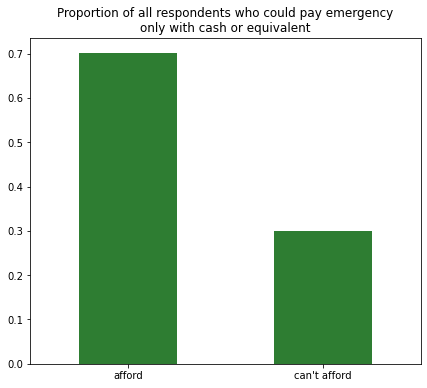

In [61]:
# just for the visual
pd.Series([afford, 1-afford], index = ["afford", "can't afford"]
         ).plot(kind = 'bar', color = pal[2], rot = 0, figsize = (7, 6),
                title = "Proportion of all respondents who could pay emergency\nonly with cash or equivalent")

plt.savefig('images/shed_afford.jpeg')

Cash OR card NOT both

In [49]:
shed.loc[shed.n_yes.eq(1) & (shed.EF3_c.eq('yes') | shed.EF3_a.eq('yes'))].shape[0] / shed.shape[0]

0.5812864536268791

### What to make of this?
Discussed in lecture.